# Bondy Tail Sensitivity

In [3]:
import chainladder as cl




This example demonstrates the usage of the `TailBondy` estimator as well as
passing multiple scoring functions to `GridSearch`.  When the ``earliest_age``
is set to the last available in the Triangle, the estimator reverts to the
traditional Bondy method.


In [5]:
# Fit basic development to a triangle
tri = cl.load_sample('tail_sample')['paid']
dev = cl.Development(average='simple').fit_transform(tri)

# Return both the tail factor and the Bondy exponent in the scoring function
scoring = {
    'tail_factor': lambda x: x.tail_.values[0,0],
    'bondy_exponent': lambda x : x.b_.values[0,0]}

# Vary the 'earliest_age' assumption in GridSearch
param_grid=dict(earliest_age=list(range(12, 120, 12)))
grid = cl.GridSearch(cl.TailBondy(), param_grid, scoring)
results = grid.fit(dev).results_



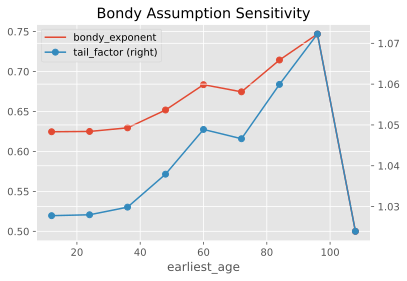

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

ax = results.plot(x='earliest_age', y='bondy_exponent',
                  title='Bondy Assumption Sensitivity', marker='o')
results.plot(x='earliest_age', y='tail_factor', grid=True,
             secondary_y=True, ax=ax, marker='o');

In [7]:
from myst_nb import glue
glue("plot_bondy_sensitivity", ax.get_figure(), display=False)